In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('theRestMidRatingData.csv')
chessdata['Opening_new'].describe()


count                89631
unique                  90
top       Sicilian Defense
freq                 12737
Name: Opening_new, dtype: object

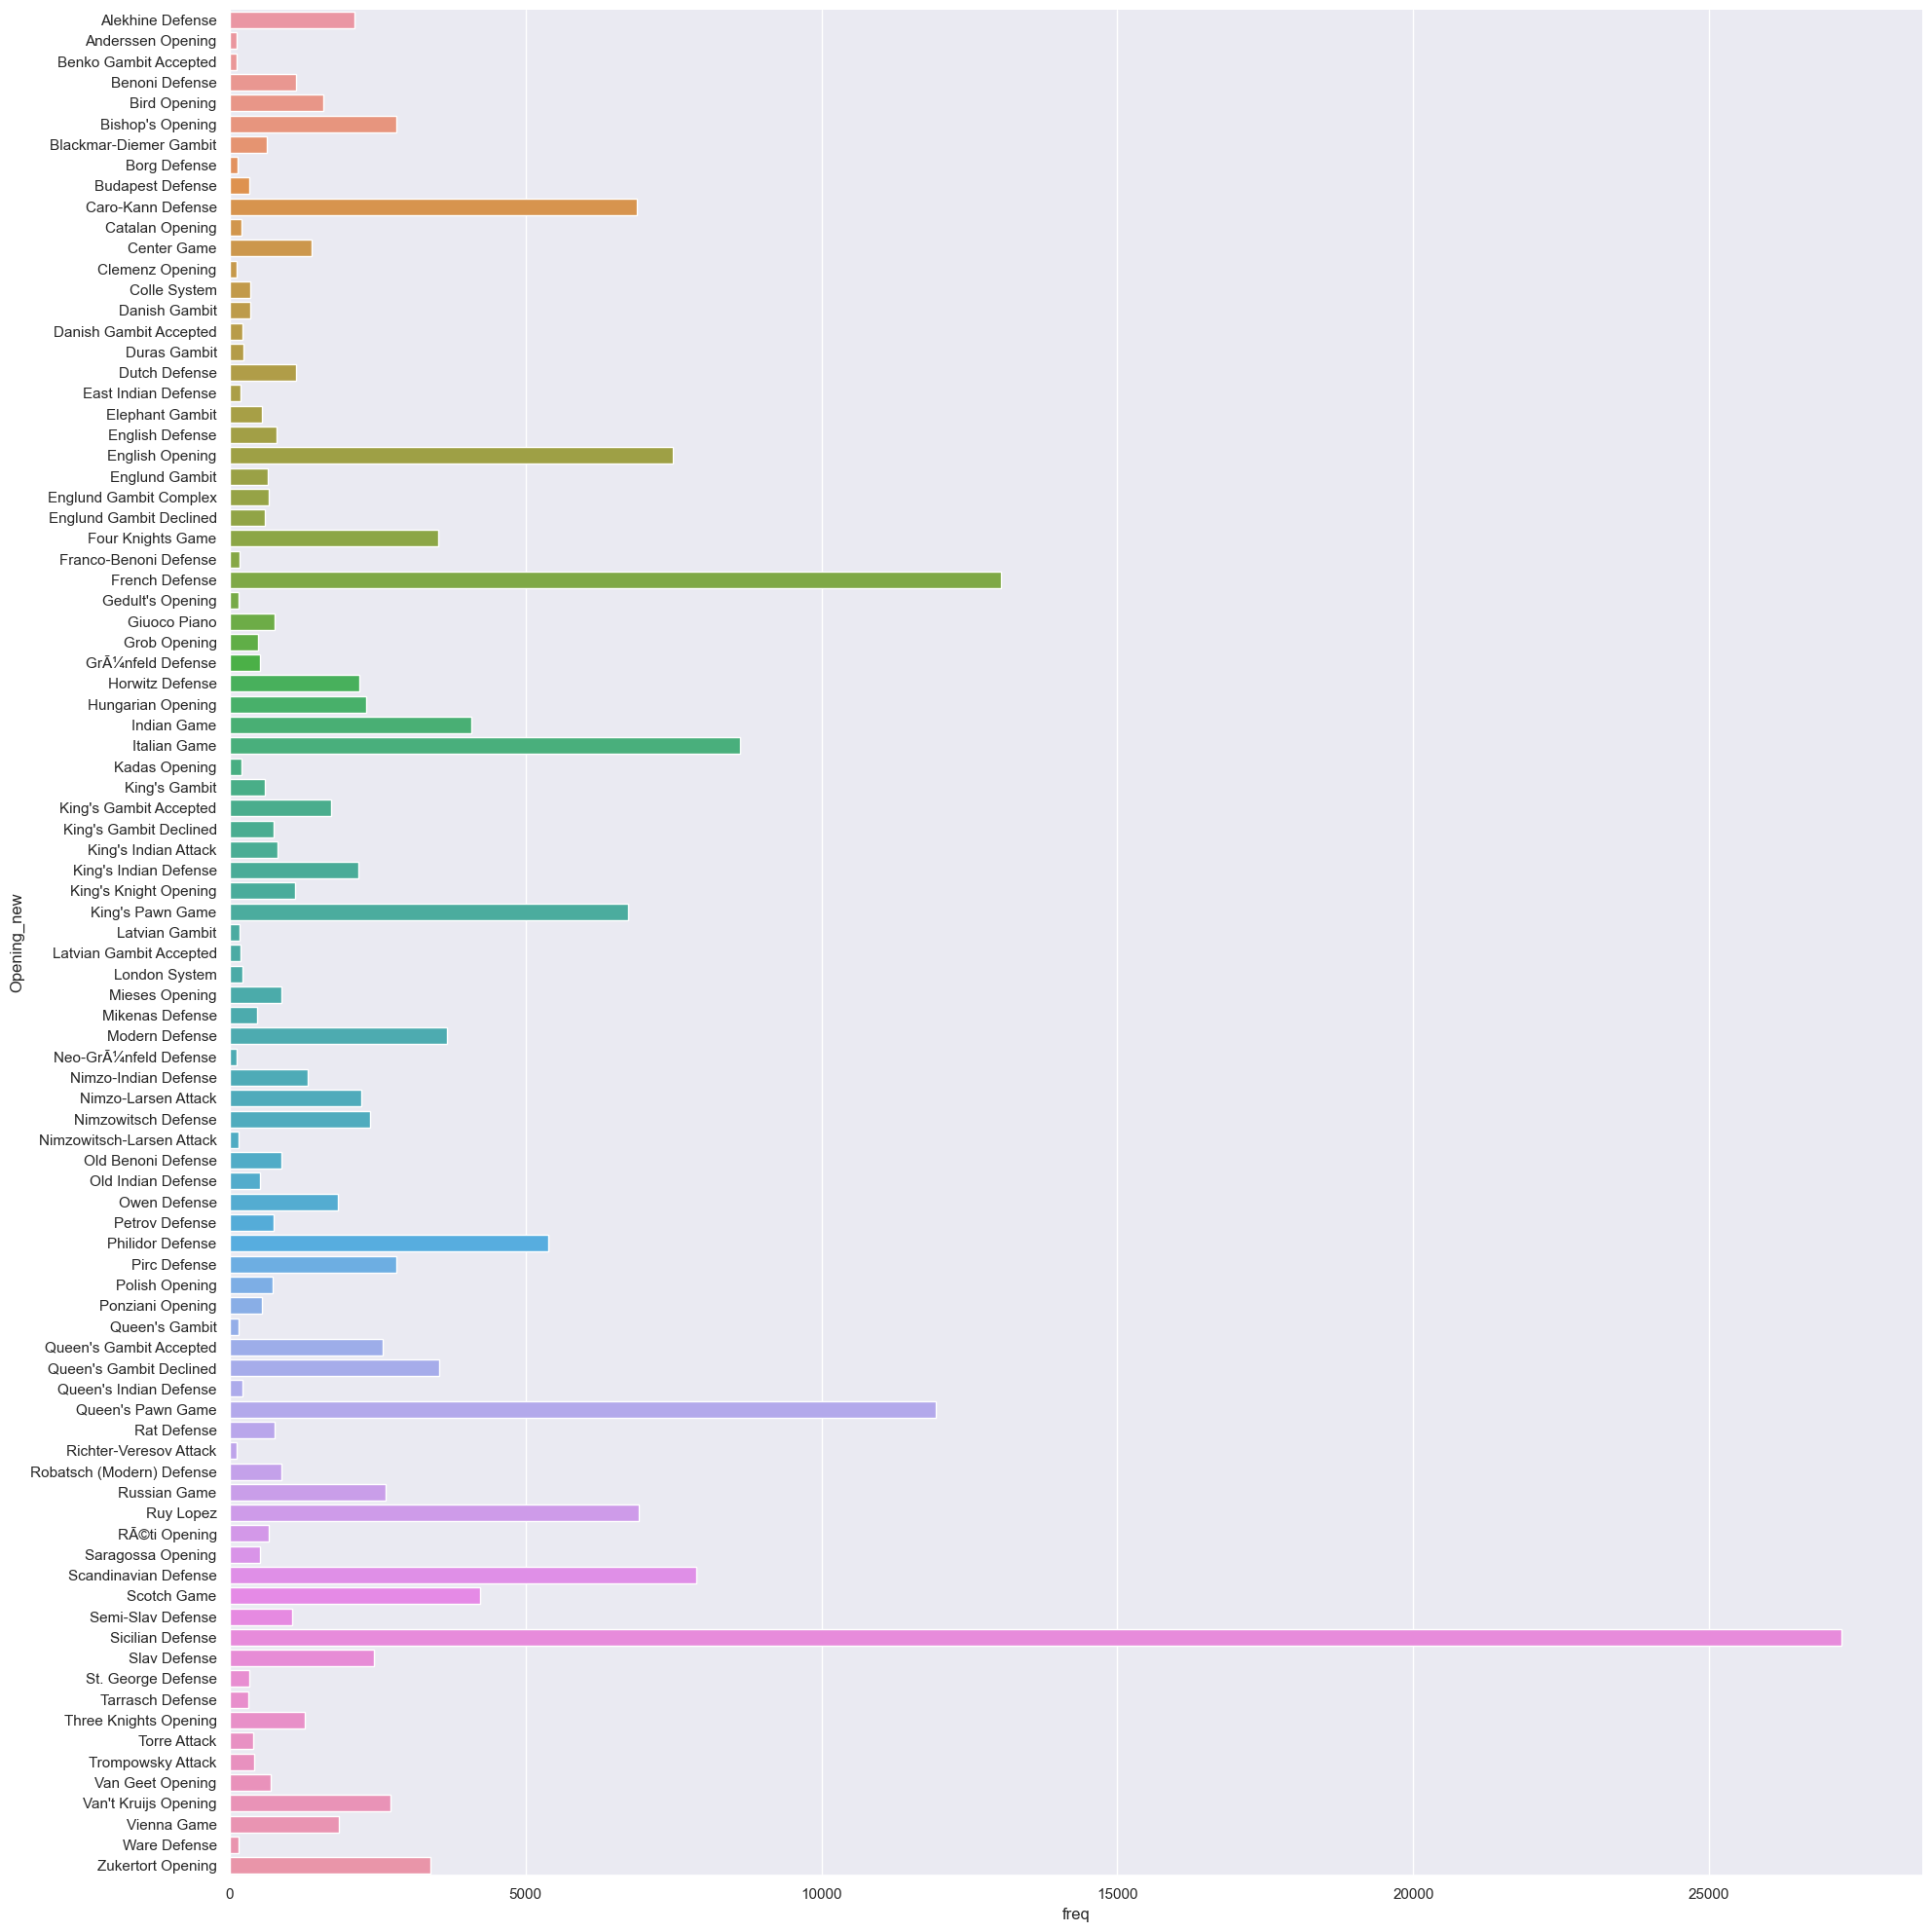

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]
temp = temp[temp.Result != '*']

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


,Opening_new,tot,win,win_rate
1395,Clemenz Opening,42,10,0.238095
13,Richter-Veresov Attack,55,17,0.309091
2494,Gedult's Opening,69,22,0.318841
1335,Queen's Indian Defense,56,20,0.357143
460,Neo-GrÃ¼nfeld Defense,23,9,0.391304
...,...,...,...,...
18,Philidor Defense,2770,1716,0.619495
523,Catalan Opening,42,27,0.642857
1223,Borg Defense,44,29,0.659091
11088,Benko Gambit Accepted,9,6,0.666667


Win rate for white

In [6]:
temp = temp[temp['tot'] >500]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
269,Van't Kruijs Opening,1169,469,0.401198
78,Hungarian Opening,1033,441,0.426912
14,Bishop's Opening,1413,608,0.43029
95,Nimzo-Larsen Attack,965,420,0.435233
22,Caro-Kann Defense,3066,1350,0.440313
37,Alekhine Defense,754,345,0.45756
41,Indian Game,1846,845,0.457746
1,Sicilian Defense,12737,5873,0.461098
567,Center Game,595,278,0.467227
10,Four Knights Game,1649,771,0.467556


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]
temp1 = temp1[temp1.Result != '*']

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
655,Queen's Gambit,77,22,0.285714
1223,Borg Defense,44,13,0.295455
11088,Benko Gambit Accepted,9,3,0.333333
523,Catalan Opening,42,14,0.333333
4615,Nimzowitsch-Larsen Attack,67,23,0.343284
...,...,...,...,...
315,Anderssen Opening,45,27,0.6
1335,Queen's Indian Defense,56,34,0.607143
2494,Gedult's Opening,69,45,0.652174
13,Richter-Veresov Attack,55,36,0.654545


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >500]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
18,Philidor Defense,2770,993,0.358484
100,Queen's Gambit Accepted,1341,504,0.375839
92,Horwitz Defense,996,391,0.39257
110,Scotch Game,2095,887,0.423389
187,King's Gambit Accepted,884,375,0.424208
42,Queen's Gambit Declined,3330,1421,0.426727
7,Ruy Lopez,3412,1483,0.434642
8,Owen Defense,932,408,0.437768
21,Slav Defense,1087,480,0.441582
24,King's Indian Defense,817,362,0.443084


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
chessdata = chessdata[chessdata.Result != '*']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]


In [10]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))
predictors_cat_ohe

,Opening_new_Alekhine Defense,Opening_new_Anderssen Opening,Opening_new_Benko Gambit Accepted,Opening_new_Benoni Defense,Opening_new_Bird Opening,Opening_new_Bishop's Opening,Opening_new_Blackmar-Diemer Gambit,Opening_new_Borg Defense,Opening_new_Budapest Defense,Opening_new_Caro-Kann Defense,...,Opening_new_St. George Defense,Opening_new_Tarrasch Defense,Opening_new_Three Knights Opening,Opening_new_Torre Attack,Opening_new_Trompowsky Attack,Opening_new_Van Geet Opening,Opening_new_Van't Kruijs Opening,Opening_new_Vienna Game,Opening_new_Ware Defense,Opening_new_Zukertort Opening
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [12]:
# chessdata.info()
chessdata['ELO Diff'] = chessdata['WhiteElo'] - chessdata['BlackElo']
chessdata['Ave ELO']=.5*(chessdata['WhiteElo'] +chessdata['BlackElo'])
chessData_num = chessdata[['ELO Diff','Ave ELO']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)
predictors_cat_ohe[['ELO Diff', 'Ave ELO']] = chessData_num
predictors_cat_ohe['res'] = chessData_res
predictors_cat_ohe = predictors_cat_ohe.dropna()
predictors_cat_ohe

,Opening_new_Alekhine Defense,Opening_new_Anderssen Opening,Opening_new_Benko Gambit Accepted,Opening_new_Benoni Defense,Opening_new_Bird Opening,Opening_new_Bishop's Opening,Opening_new_Blackmar-Diemer Gambit,Opening_new_Borg Defense,Opening_new_Budapest Defense,Opening_new_Caro-Kann Defense,...,Opening_new_Torre Attack,Opening_new_Trompowsky Attack,Opening_new_Van Geet Opening,Opening_new_Van't Kruijs Opening,Opening_new_Vienna Game,Opening_new_Ware Defense,Opening_new_Zukertort Opening,ELO Diff,Ave ELO,res
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,1304.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,1604.5,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-39,1695.5,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100,1419.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356,1537.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,1340.5,-1
89627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-35,1473.5,-1
89628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,1562.0,1
89629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11,1444.5,1


In [17]:


# Extract Response and Predictors
y = pd.DataFrame(predictors_cat_ohe['res'])
X = pd.DataFrame(predictors_cat_ohe.drop('res', axis = 1))
X = X.drop('Ave ELO', axis = 1)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=30) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6, min_samples_leaf=30)

In [18]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5429623372276502

Test Data
Accuracy  :	 0.5400892525102269



[Text(0.4563253012048193, 0.9285714285714286, 'ELO Diff <= -55.5\ngini = 0.522\nsamples = 62741\nvalue = [29632, 1496, 31613]\nclass = White'),
 Text(0.18072289156626506, 0.7857142857142857, 'ELO Diff <= -305.5\ngini = 0.502\nsamples = 11284\nvalue = [6610, 242, 4432]\nclass = Black'),
 Text(0.0783132530120482, 0.6428571428571429, 'Opening_new_English Opening <= 0.5\ngini = 0.381\nsamples = 1229\nvalue = [922, 16, 291]\nclass = Black'),
 Text(0.06626506024096386, 0.5, 'ELO Diff <= -497.5\ngini = 0.374\nsamples = 1187\nvalue = [898, 14, 275]\nclass = Black'),
 Text(0.03614457831325301, 0.35714285714285715, 'ELO Diff <= -520.5\ngini = 0.327\nsamples = 433\nvalue = [345, 4, 84]\nclass = Black'),
 Text(0.024096385542168676, 0.21428571428571427, 'ELO Diff <= -563.5\ngini = 0.34\nsamples = 382\nvalue = [300, 3, 79]\nclass = Black'),
 Text(0.012048192771084338, 0.07142857142857142, 'gini = 0.311\nsamples = 292\nvalue = [236, 1, 55]\nclass = Black'),
 Text(0.03614457831325301, 0.07142857142857

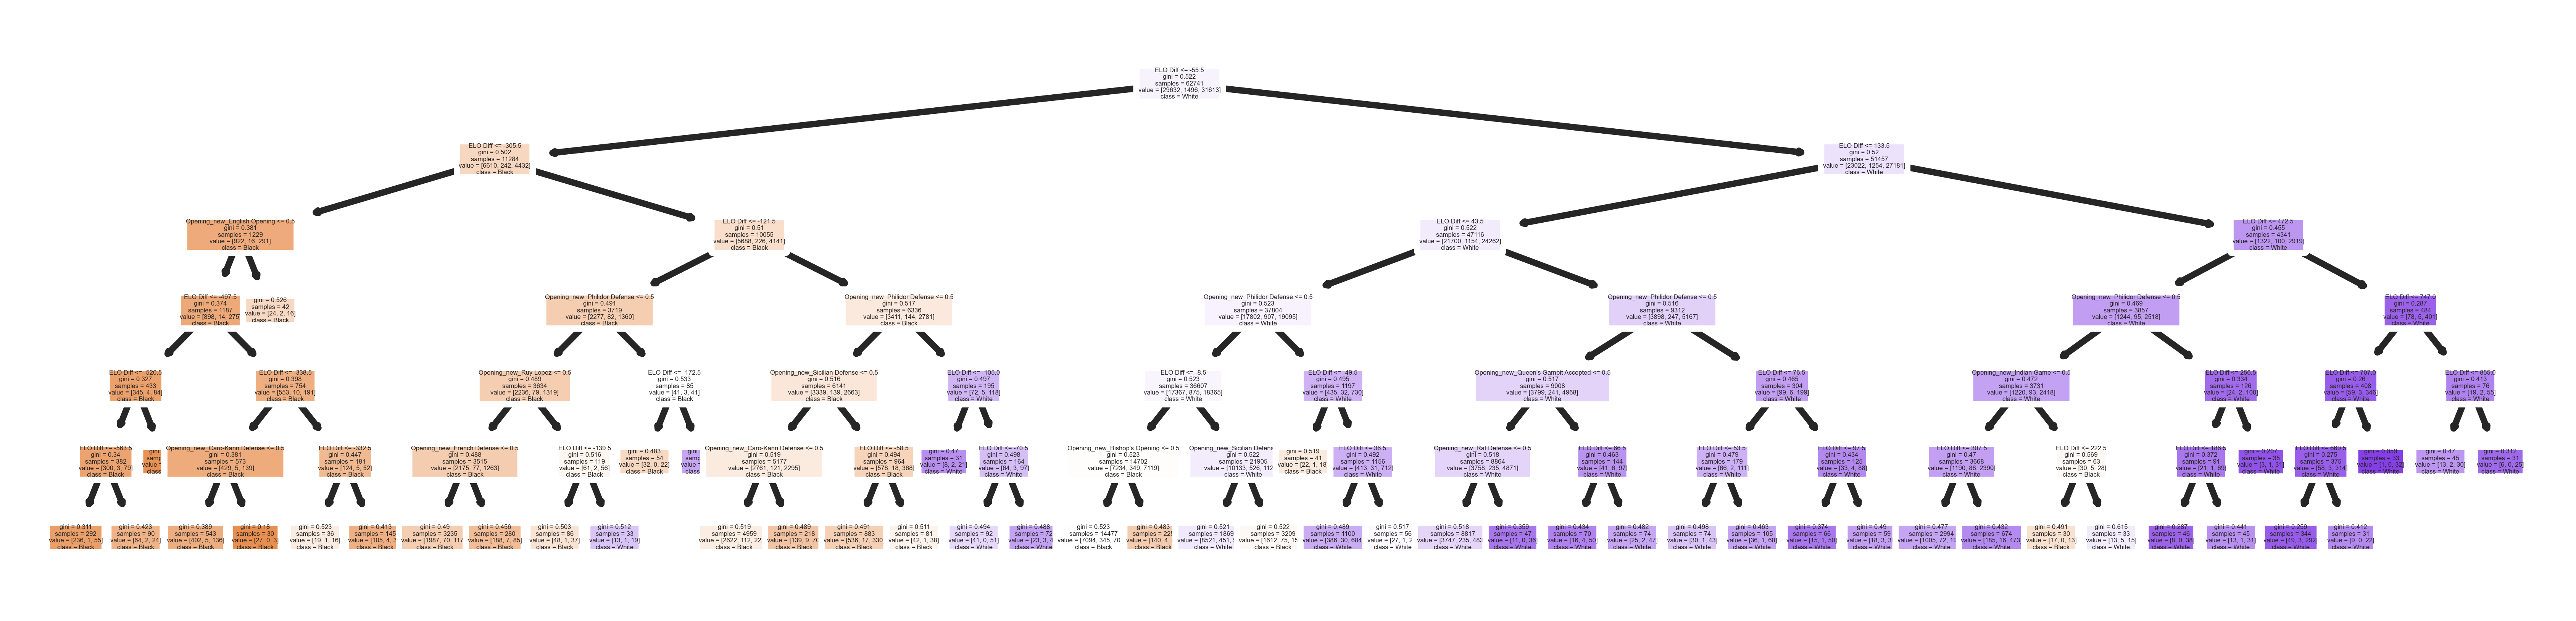

In [19]:
f = plt.figure(dpi=1200, figsize=(7,1.5),linewidth=.1)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])



![The Philidor Defence](midphoto/mid_left.png "Title")

![The Philidor Defence](midphoto/mid_right.png "Title")

When Black stronger than white, Sicilian and Caro Kann Good for Black, Philidor Good for White.
When white is stronger than black, Sicilian and Caro Kann Good for Black, though if the average rating is above 1400, white is able to equalise in the Sicilian, Philidor is still Good for White.
When white is much better than black, the Indian Game with 63 games played, massively increases Black's winning chances.